# 5. Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neural_network as nn

## Regression

In [2]:
def create_toy_dataset(func, n=300):
    x = np.random.uniform(size=(n, 1))
    t = func(x) + np.random.uniform(-0.1, 0.1, size=(n, 1))
    return x, t

def func(x):
        return x + 0.3 * np.sin(2 * np.pi * x)

x, t = create_toy_dataset(func)

In [3]:
layers = [nn.Layer(1, 6, std=1., bias=-0.5), nn.Tanh(), nn.Layer(6, 1, std=1., bias=0.5)]
cost_function = nn.SumSquaresError()
model = nn.NeuralNetwork(layers, cost_function)
# nn._gradient_check()
for i in range(100000):
    if i % 10000 == 0:
        print("step %6d, cost %f" % (i, model.cost(x, t)))
    model.fit(x, t, learning_rate=0.001)

step      0, cost 66.005947
step  10000, cost 0.464231
step  20000, cost 0.457792
step  30000, cost 0.563282
step  40000, cost 0.457031
step  50000, cost 0.457231
step  60000, cost 0.456712
step  70000, cost 0.456765
step  80000, cost 0.459067
step  90000, cost 0.461454


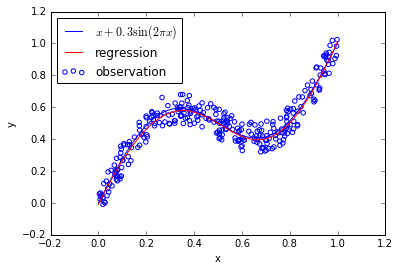

In [4]:
plt.scatter(x, t, facecolor="none", edgecolor="b", label="observation")
x_test = np.linspace(0, 1, 1000)[:, np.newaxis]
y = model.predict(x_test)
plt.plot(x_test, func(x_test), color="blue", label="$x+0.3\sin(2\pi x)$")
plt.plot(x_test, y, color="red", label="regression")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Classification

In [5]:
def create_toy_dataset():
    x = np.random.uniform(-1., 1., size=(1000, 2))
    labels = (np.prod(x, axis=1) > 0).astype(np.float)
    return x, labels.reshape(-1, 1)

x, labels = create_toy_dataset()

In [6]:
layers = [nn.Layer(2, 4), nn.Tanh(), nn.Layer(4, 1)]
cost_function = nn.SigmoidCrossEntropy()
model = nn.NeuralNetwork(layers, cost_function)
for i in range(100000):
    if i % 10000 == 0:
        print("step %6d, cost %f" % (i, model.cost(x, labels)))
    model.fit(x, labels, learning_rate=0.001)

step      0, cost 713.321719
step  10000, cost 26.435617
step  20000, cost 20.039738
step  30000, cost 17.697630
step  40000, cost 19.321701
step  50000, cost 14.865974
step  60000, cost 14.630383
step  70000, cost 15.097111
step  80000, cost 17.056199
step  90000, cost 21.350048


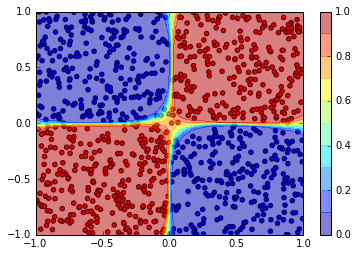

In [7]:
X_test, Y_test = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x_test = np.array([X_test, Y_test]).transpose(1, 2, 0).reshape(-1, 2)
probs = model.predict(x_test)
Probs = probs.reshape(100, 100)
levels = np.linspace(0, 1, 11)
colors = ["blue", "red"]
plt.scatter(x[:, 0], x[:, 1], c=[colors[int(label)] for label in labels])
plt.contourf(X_test, Y_test, Probs, levels, alpha=0.5)
plt.colorbar()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

## 5.6 Mixture Density Networks

In [8]:
def create_toy_dataset(func, n=300):
    t = np.random.uniform(size=(n, 1))
    x = func(t) + np.random.uniform(-0.05, 0.05, size=(n, 1))
    return x, t

def func(x):
        return x + 0.3 * np.sin(2 * np.pi * x)

x, t = create_toy_dataset(func)

In [9]:
def sample(x, t, n=None):
    assert len(x) == len(t)
    N = len(x)
    if n is None:
        n = N
    indices = np.random.choice(N, n, replace=False)
    return x[indices], t[indices]

layers = [nn.Layer(1, 5, std=0.1), nn.Tanh(), nn.Layer(5, 9, std=0.1)]
cost_function = nn.GaussianMixture(3)
model = nn.NeuralNetwork(layers, cost_function)

learning_rate = 1e-4
for i in range(500000):
    if i % 10000 == 0:
        print("step %6d, cost %f" % (i, model.cost(x, t)))
        learning_rate *= 0.9
    batch = sample(x, t, n=100)
    model.fit(*batch, learning_rate=learning_rate)

step      0, cost 326.860281
step  10000, cost -288.041828
step  20000, cost -347.138096
step  30000, cost -255.311876
step  40000, cost -364.752045
step  50000, cost -344.857096
step  60000, cost -372.995082
step  70000, cost -384.834695
step  80000, cost -324.466247
step  90000, cost -286.335166
step 100000, cost -308.568148
step 110000, cost -377.100348
step 120000, cost -380.622802
step 130000, cost -337.945648
step 140000, cost -13.534439
step 150000, cost -427.371532
step 160000, cost -409.076945
step 170000, cost -410.660070
step 180000, cost -412.002710
step 190000, cost -402.082834
step 200000, cost -430.559906
step 210000, cost -428.822845
step 220000, cost -438.925585
step 230000, cost -425.673091
step 240000, cost -427.475670
step 250000, cost -438.386862
step 260000, cost -438.871956
step 270000, cost -433.370644
step 280000, cost -442.552561
step 290000, cost -442.538968
step 300000, cost -442.122889
step 310000, cost -444.821778
step 320000, cost -444.894341
step 330000,

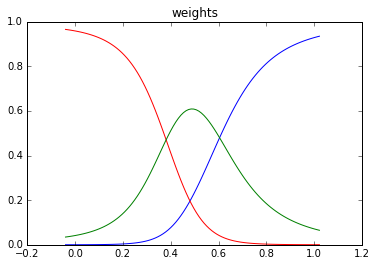

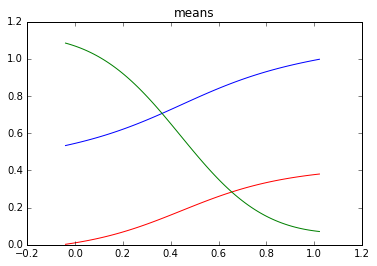

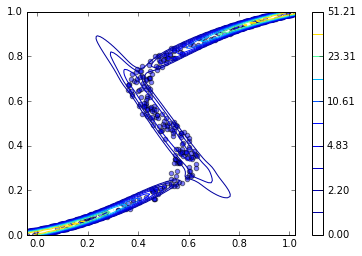

In [11]:
x_test = np.linspace(x.min(), x.max(), 100)
y_test = np.linspace(t.min(), t.max(), 100)
X_test, Y_test = np.meshgrid(x_test, y_test)
test = np.array([X_test, Y_test]).transpose(1, 2, 0).reshape(-1, 2)

sigma, weight, mu = model.predict(test[:, 0].reshape(-1, 1))
probs = cost_function.gauss(mu, sigma, test[:, 1].reshape(-1, 1))
probs = np.sum(weight * probs, axis=1)
Probs = probs.reshape(100, 100)

plt.plot(x_test, weight[:100, 0], color="blue")
plt.plot(x_test, weight[:100, 1], color="red")
plt.plot(x_test, weight[:100, 2], color="green")
plt.title("weights")
plt.show()

plt.plot(x_test, mu[:100, 0], color="blue")
plt.plot(x_test, mu[:100, 1], color="red")
plt.plot(x_test, mu[:100, 2], color="green")
plt.title("means")
plt.show()

plt.scatter(x, t, alpha=0.5, label="observation")
levels_log = np.linspace(0, np.log(probs.max()), 11)
levels = np.exp(levels_log)
levels[0] = 0
plt.contour(X_test, Y_test, Probs, levels)
plt.colorbar()
plt.xlim(x.min(), x.max())
plt.ylim(t.min(), t.max())
plt.show()